As always, import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# custom functions for data preparation
import Ex1_functions as ff

/Users/Jonas/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Supervised learning

In this notebook, we will train a Random Forest Classifier on the soccer data we handled in the Data Analysis and Cleaning notebook.

First, we import the numeric data we prepared:

In [2]:
df = pd.read_csv('data/players_with features_no_nan_only_num_values.csv')
df.head(3)

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,skin_colour,gravity,meanIAT_yellowCards,meanIAT_yellowReds,meanIAT_redCards,meanIAT_gravity,meanExp_yellowCards,meanExp_yellowReds,meanExp_redCards,meanExp_gravity
0,177.0,72.0,144.0,65.0,32.0,47.0,10.0,21.0,1.0,2.0,0.375,116.674213,0.058858,0.000535,0.001203,0.114196,0.093395,0.001087,0.002447,0.205938
1,179.0,82.0,427.0,183.0,101.0,143.0,88.0,33.0,0.0,2.0,0.750,95.589050,0.020451,0.000000,0.001752,0.075289,0.013638,0.000000,-0.000520,-0.002640
2,182.0,71.0,654.0,247.0,179.0,228.0,9.0,19.0,0.0,0.0,0.125,19.000000,0.011768,0.000000,0.000000,0.011768,0.018965,0.000000,0.000000,0.018965


Remember, the *skin_colour* column is actually the average rating over the two raters. Let's bring up its values:

In [3]:
df.skin_colour.unique()

array([ 0.375,  0.75 ,  0.125,  1.   ,  0.25 ,  0.   ,  0.5  ,  0.875,
        0.625])

As it stands, there are 9 values that encode skin colour. We make the choice to reduce these values to only four categories, which we believe are enough to roughly determine a person's skin colour.

## First set of features

As a test, we train a random forest on all the features of our data.

In [4]:
# comment out the features you want to pass to the classifier!
cols = [#'height', 
        #'weight', 
        #'games', 
        #'victories', 
        #'ties', 
        #'defeats', 
        #'goals', 
        #'yellowCards',
        #'yellowReds',
        #'redCards',
        'skin_colour', 
        #'gravity',
        #'meanIAT_yellowCards',
        #'meanIAT_yellowReds', 
        #'meanIAT_redCards',
        #'meanIAT_gravity',
        #'meanExp_yellowCards',
        #'meanExp_yellowReds', 
        #'meanExp_redCards',
        #'meanExp_gravity'
       ]

In [5]:
# choose the appropriate separator for skin_colour
b = ff.separator
# transform the df into np matrix
data, target, labels = ff.prepare_data(df, cols, b)

df shape: (1419, 20)
data shape: (1419, 19)
target shape: (1419,)


In [24]:
x = df.skin_colour.apply(ff.separator)

In [26]:
x.value_counts()

0    1015
1     177
3     114
2     113
Name: skin_colour, dtype: int64

Instantiating a Random Forest Classifier

In [6]:
forest = RandomForestClassifier(n_estimators = 100, max_features=0.33, max_depth=10, n_jobs=-1, oob_score=True)

In [7]:
forest = ff.train_test_RF(forest, data, target, 150)

In [8]:
forest.oob_score_

0.70147783251231532

We iterate over a number of forests with a different number of estimators and use the OOB score to figure out how many estimators is enough.

In [19]:
oob = []
for i in range(5, 200, 1):
    forest = RandomForestClassifier(n_estimators = i, max_features=0.33, max_depth=10, n_jobs=-1, oob_score=True)
    forest = ff.train_test_RF(forest, data, target, 150)
    oob.append(1-forest.oob_score_)
    #print('oob: '+str(forest.oob_score_))
    #print(' ')

/Users/Jonas/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/Jonas/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/Jonas/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/Jonas/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn

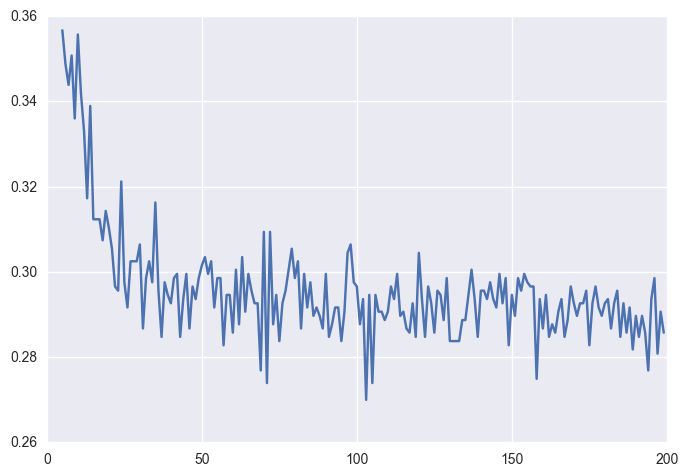

In [20]:
plt.plot(range(5, 200, 1), oob, '-')

We start by applying a simple train/test split, with the help of sklearn. Also, we hold out a slice of the data to test the fit further.

In [21]:
imp = forest.feature_importances_

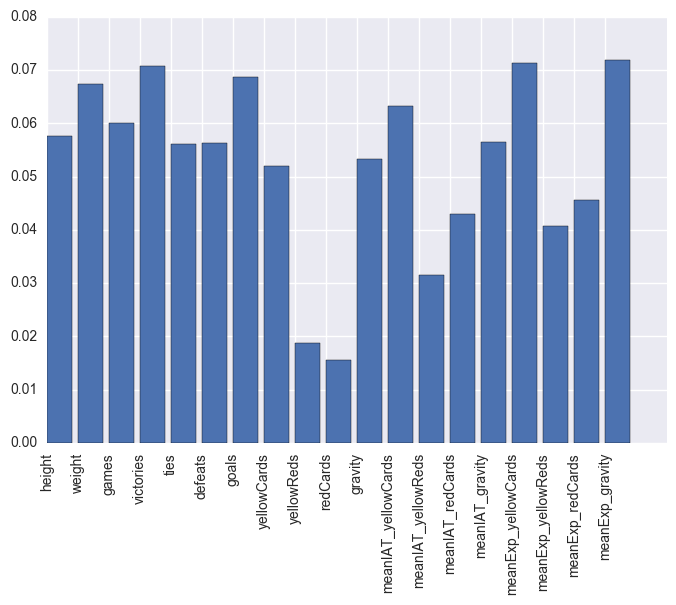

In [22]:
ff.impo_graph(imp, labels)

## Second set of features

In [ ]:
# comment out the features you want to pass to the classifier!
cols = [#'height', 
        #'weight', 
        #'games', 
        #'victories', 
        #'ties', 
        #'defeats', 
        #'goals', 
        'skin_colour', 
        'yellowCards',
        'yellowReds', 
        'redCards',
        'gravity', 
        'meanIAT_yellowReds', 
        'meanIAT_redCards', 
        'meanExp_yellowReds', 
        'meanExp_redCards',
        'meanIAT_yellowCards', 
        'meanIAT_gravity',
        'meanExp_yellowCards', 
        'meanExp_redCards', 
        'meanExp_gravity'
       ]

In [ ]:
b = ff.separator
data, target, labels = ff.prepare_data(df, cols, b)

In [ ]:
forest2 = RandomForestClassifier(n_estimators = 100)

In [ ]:
forest2 = ff.train_test_RF(forest2, data, target, 150)

We note here something quite disappointing: the results are almost the same, although we did not use any racism information.

In [ ]:
imp2 = forest2.feature_importances_

In [ ]:
ff.impo_graph(imp2, labels)

In [ ]:
from sklearn.cross_validation import cross_val_score

In [ ]:
f = RandomForestClassifier(n_estimators = 100)

In [ ]:
scores = cross_val_score(f, data, target, cv=30, scoring='accuracy')

In [ ]:
f.feature_importances_

In [ ]:
scores

idea: use a hold-out sample

In [ ]:
scores.mean()

Heavily inspired by http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

X, y = data, target


title = "Learning Curves (RF Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(n_estimators=100)
plot_learning_curve(estimator, title, X, y, ylim=(-3, 3), cv=cv, n_jobs=1)

plt.show()